In [23]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator

In [24]:
#construct an instance of ImageDataGenerator class
train_datagen = ImageDataGenerator(
    rescale = 1
)
test_datagen = ImageDataGenerator(
    rescale = 1
)

In [25]:
#defining the sequential model for multiclass classification
model = keras.Sequential()

In [26]:
# Defining the CNN layers
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(100,100,3), padding='same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2,2)))
          
model.add(layers.Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2,2)))
          
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(5, activation='softmax'))

In [27]:
#prepare iterators to loop through each and every image
training_iterator = train_datagen.flow_from_directory('dataset/flowers/train', batch_size=64, target_size=(100,100))
testing_iterator = test_datagen.flow_from_directory('dataset/flowers/test', batch_size=64, target_size=(100,100))


Found 3113 images belonging to 5 classes.
Found 1210 images belonging to 5 classes.


In [28]:
#Compile and fit the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
history = model.fit(training_iterator, validation_data = testing_iterator, epochs=8)

Epoch 1/8
49/49 [==============================] - 47s 938ms/step - loss: 113.0330 - accuracy: 0.2459 - val_loss: 1.4527 - val_accuracy: 0.3702
Epoch 2/8
49/49 [==============================] - 41s 837ms/step - loss: 1.3518 - accuracy: 0.4445 - val_loss: 1.3849 - val_accuracy: 0.4041
Epoch 3/8
49/49 [==============================] - 39s 796ms/step - loss: 1.0948 - accuracy: 0.5719 - val_loss: 1.2770 - val_accuracy: 0.4893
Epoch 4/8
49/49 [==============================] - 40s 812ms/step - loss: 0.8127 - accuracy: 0.6780 - val_loss: 1.3914 - val_accuracy: 0.4942
Epoch 5/8
49/49 [==============================] - 39s 799ms/step - loss: 0.6635 - accuracy: 0.7523 - val_loss: 1.4557 - val_accuracy: 0.5124
Epoch 6/8
49/49 [==============================] - 41s 828ms/step - loss: 0.4476 - accuracy: 0.8420 - val_loss: 1.6954 - val_accuracy: 0.4802
Epoch 7/8
49/49 [==============================] - 47s 963ms/step - loss: 0.3465 - accuracy: 0.8900 - val_loss: 1.9641 - val_accuracy: 0.4876
Epoc

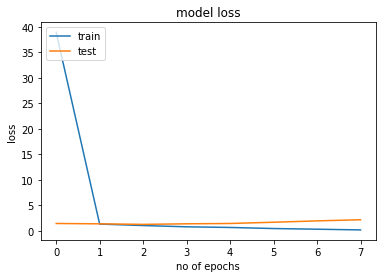

In [29]:
import matplotlib.pyplot as plt

#plot loss vs epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('no of epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

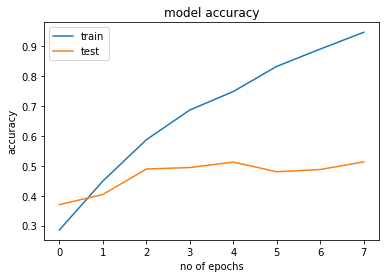

In [30]:
#plot accuracy vs epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('no of epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [31]:
#get the class labels from iterator
class_labels = training_iterator.class_indices
print(class_labels)

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}


In [32]:
# {'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}